In [43]:
# https://stackoverflow.com/questions/34940808/hierarchical-clustering-of-time-series-in-python-scipy-numpy-pandas
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

In [44]:
#
# build 6 time series groups for testing, called: a, b, c, d, e, f
#

num_samples = 61
group_size = 10

#
# create the main time series for each group
#

x = np.linspace(0, 5, num_samples)
scale = 4

a = scale * np.sin(x)
b = scale * (np.cos(1+x*3) + np.linspace(0, 1, num_samples))
c = scale * (np.sin(2+x*6) + np.linspace(0, -1, num_samples))
d = scale * (np.cos(3+x*9) + np.linspace(0, 4, num_samples))
e = scale * (np.sin(4+x*12) + np.linspace(0, -4, num_samples))
f = scale * np.cos(x)


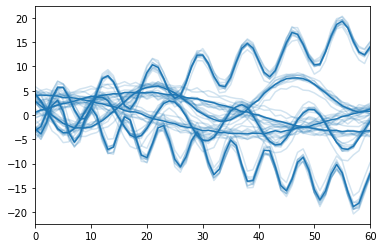

In [46]:
#
# from each main series build 'group_size' series
#

timeSeries = pd.DataFrame()
ax = None
for arr in [a,b,c,d,e,f]:
    arr = arr + np.random.rand(group_size, num_samples) + np.random.randn(group_size, 1)
    df = pd.DataFrame(arr)
    timeSeries = timeSeries.append(df)

    # We use seaborn to plot what we have
    #ax = sns.tsplot(ax=ax, data=df.values, ci=[68, 95])
    ax = sns.tsplot(ax=ax, data=df.values, err_style="unit_traces")
    
# Plotting time series
plt.show()

In [51]:
# Clustering with Linkage
Z = hac.linkage(timeSeries, method='single', metric='correlation')


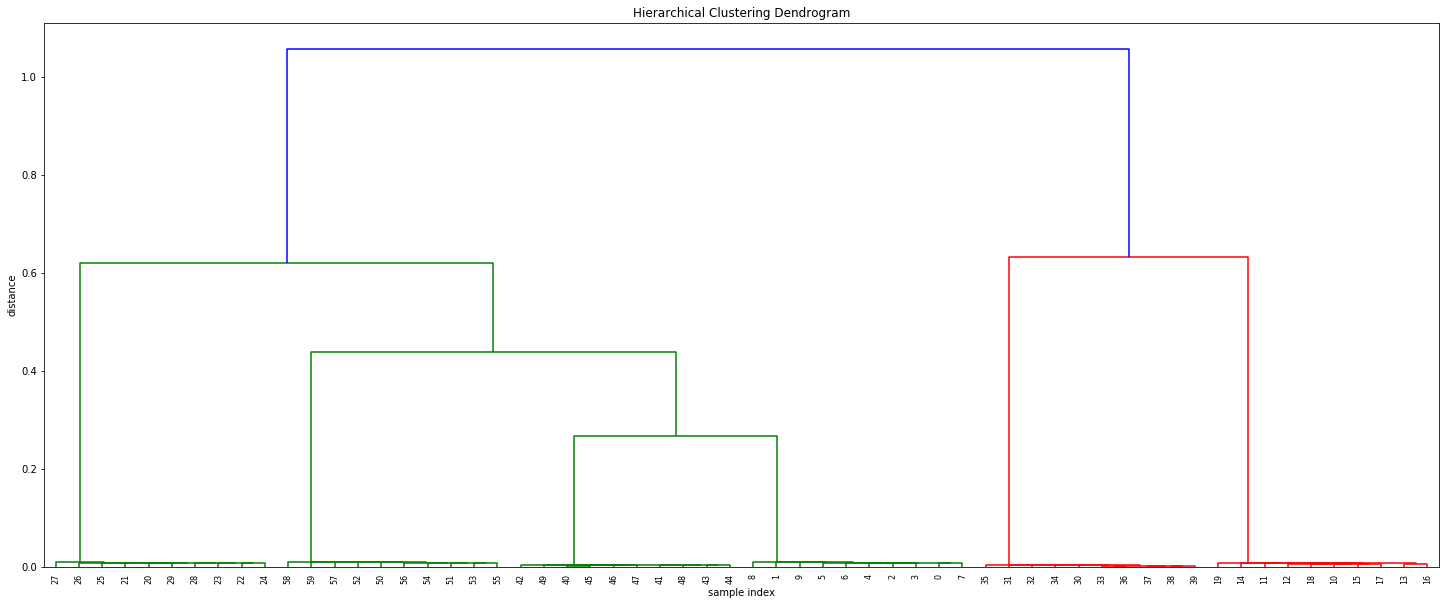

In [52]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [53]:
# Here we use spearman correlation
def my_metric(x, y):
    r = stats.spearmanr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2

# Do the clustering    
Z = hac.linkage(timeSeries,  method='single', metric=my_metric)


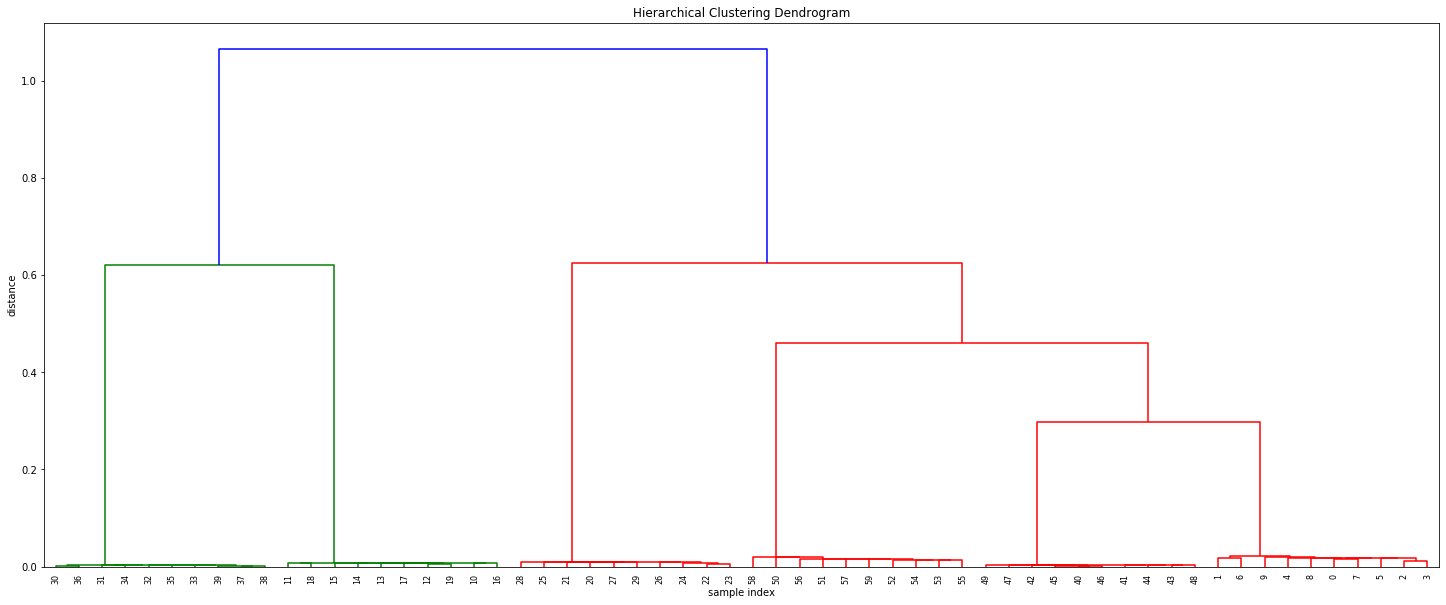

In [54]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [32]:
# Function for printing the distribution of elements in clusters and plotting together the clusters of time series

from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')
    print(results)

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
        plt.show()


[6 6 6 6 6 6 6 6 6 6 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1
 1 1 1 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4]
Cluster 6 number of entries 10


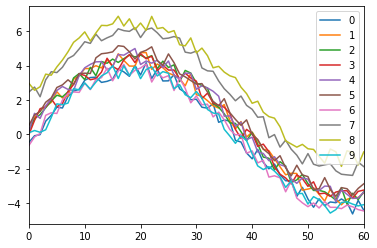

Cluster 2 number of entries 10


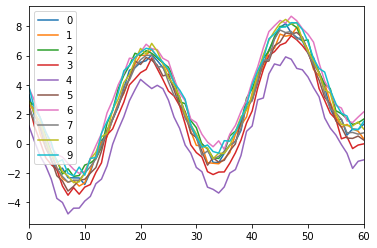

Cluster 3 number of entries 10


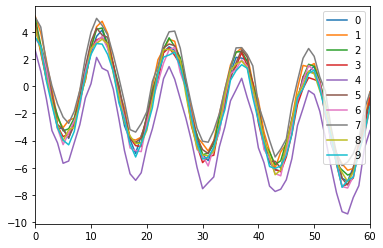

Cluster 1 number of entries 10


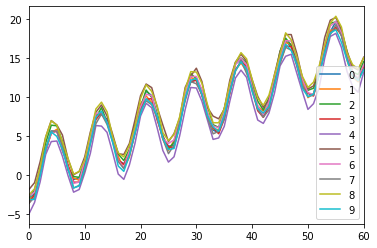

Cluster 5 number of entries 10


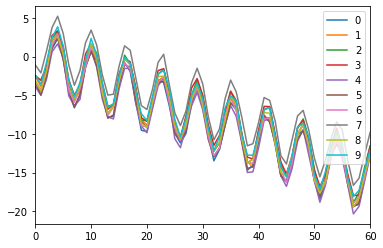

Cluster 4 number of entries 10


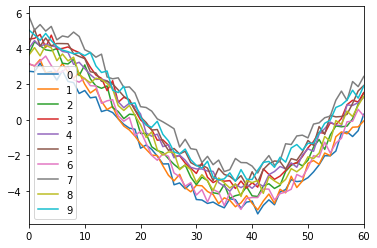

In [55]:
# Call the function
print_clusters(timeSeries, Z, 6, plot=True)

### Dynamic Time Warping

In [34]:
# pip install fastdtw

In [35]:
# Example of DTW
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

x = np.array([1, 2, 3, 3, 7])
y = np.array([1, 2, 2, 2, 2, 2, 2, 4])

distance, path = fastdtw(x, y, dist=euclidean)

print(distance)
print(path)


5.0
[(0, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 7), (3, 7), (4, 7)]


In [58]:
x = np.array([1, 2, 3, 3, 7])
y = np.array([1, 2, 2, 2, 2, 2, 2, 4])

distance, path = fastdtw(x, x, dist=euclidean)

print(distance)
print(path)

0.0
[(0, 0), (1, 1), (2, 2), (2, 3), (3, 3), (4, 4)]


In [59]:
# Here we use dtw as distance metric
def dtw(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance

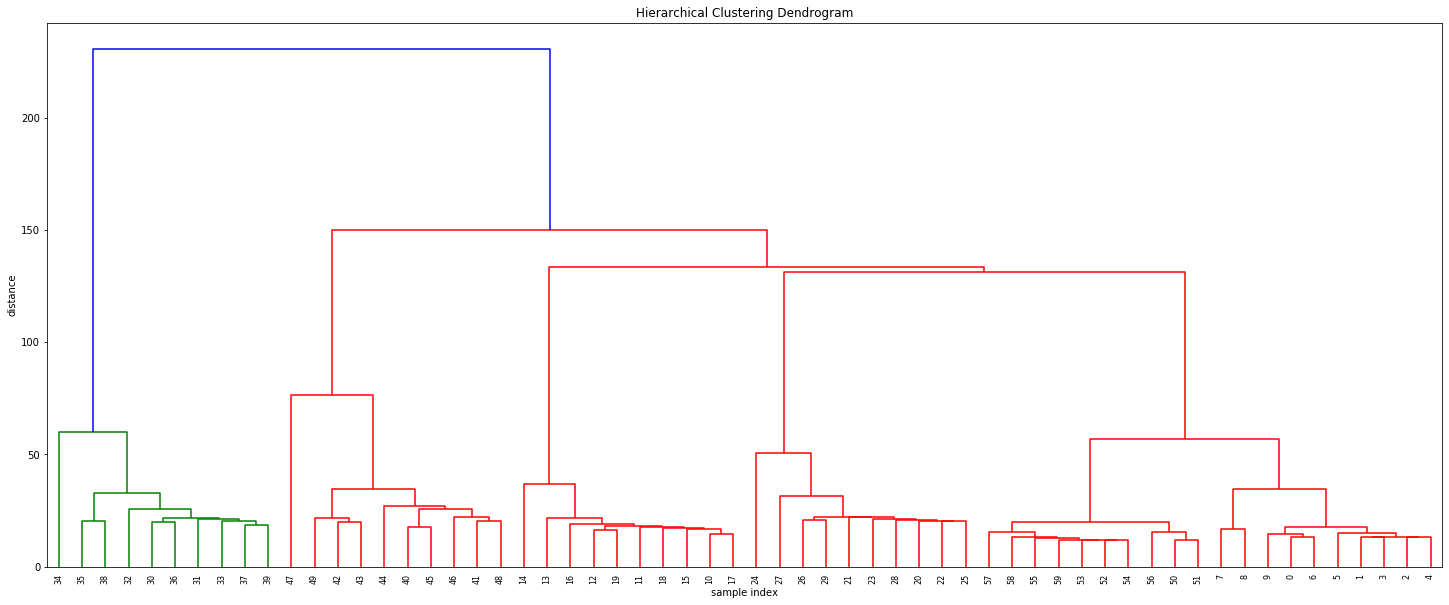

In [60]:
# Do the clustering with DTW
Z = hac.linkage(timeSeries,  method='single', metric=dtw)

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

[6 6 6 6 6 6 6 6 6 6 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 3 2 2 6 6 6 6 6 6 6 6 6 6]
Cluster 6 number of entries 20


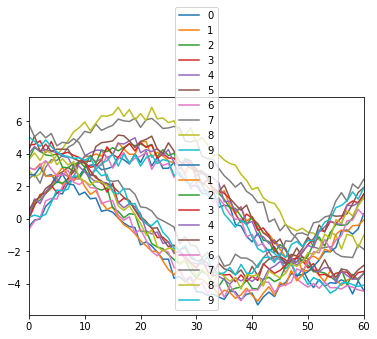

Cluster 4 number of entries 10


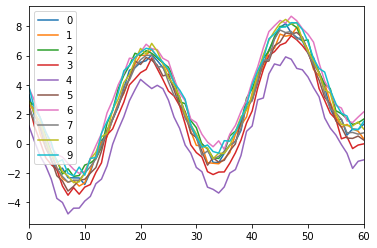

Cluster 5 number of entries 10


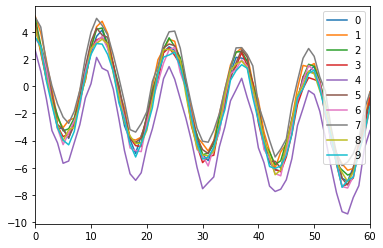

Cluster 1 number of entries 10


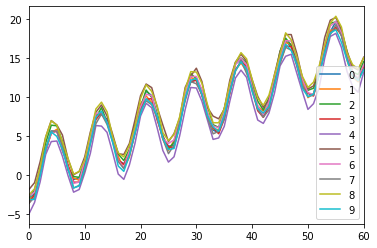

Cluster 2 number of entries 9


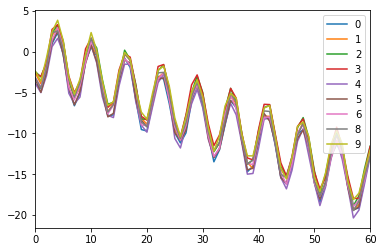

Cluster 3 number of entries 1


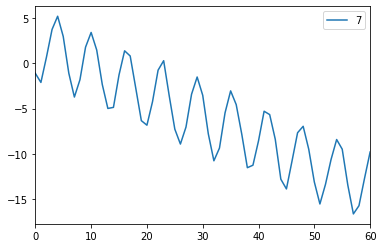

In [61]:
# Print time series clusters for k=6
print_clusters(timeSeries, Z, 6, plot=True)

#### Compare with previous clusterings
- Are all time series clustered equally using DTW?
- Is the distance scale the same?
- Is the distance between similar series shorter or larger with DTW?

In [16]:
# Print time series clusters for k=5
print_clusters(timeSeries, Z, 5, plot=False)

Cluster 5 number of entries 20
Cluster 2 number of entries 10
Cluster 3 number of entries 10
Cluster 1 number of entries 10
Cluster 4 number of entries 10


#### Answer the following questions
- Which clusters are merged by DTW with k=5? Why???
- Both Correlation and DTW merge the same series?

[5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5]
Cluster 5 number of entries 20


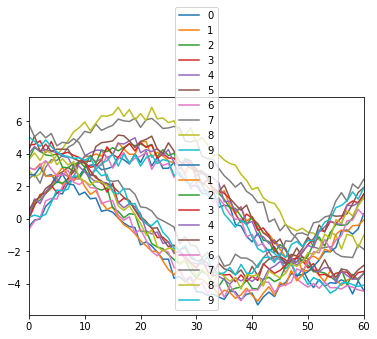

Cluster 3 number of entries 10


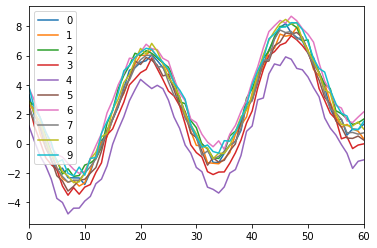

Cluster 4 number of entries 10


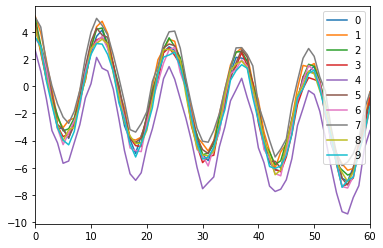

Cluster 1 number of entries 10


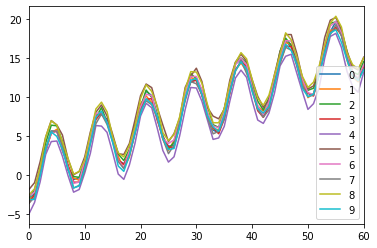

Cluster 2 number of entries 10


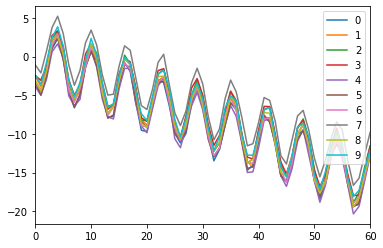

In [63]:
# Plot clusters with k=5
print_clusters(timeSeries, Z, 5, plot=True)

### Discuss
- How could you use clustering information?
- Which method should you choose?
- On which scenarios it could be usefull this technique?